# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,\
recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,f1_score,\
classification_report

# Loding dataset from sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)


In [3]:
df = data.frame

# Splitting and scaling of data

In [4]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# SVM with different kernel

In [5]:
kernels = ["linear","poly","rbf","sigmoid"]
C = [0.01, 0.1, 1, 10, 100, 1000]

In [6]:
current_C = []
current_kernel = []
training_accuracy = []
testing_accuracy = []
n_support_vectors = []

for k in kernels:
  for c in C:
    svm = SVC(kernel = k , C = c)
    svm.fit(x_train_scaled,y_train)
    train_pred = svm.predict(x_train_scaled)
    test_pred = svm.predict(x_test_scaled)
    tr_acc = accuracy_score(y_train,train_pred)
    te_acc = accuracy_score(y_test,test_pred)
    current_C.append(c)
    current_kernel.append(k)
    training_accuracy.append(tr_acc)
    testing_accuracy.append(te_acc)
    n_support_vectors.append(svm.n_support_)

# svm results

In [14]:
results_df = pd.DataFrame([current_C,current_kernel,training_accuracy,testing_accuracy,n_support_vectors])
results_df = results_df.T
cols = ["C","kernel","training score",'testing score','support vectors']
results_df.columns = cols

In [15]:
results_df

,C,kernel,training score,testing score,support vectors
0,0.01,linear,0.969231,0.973684,"[51, 52]"
1,0.1,linear,0.982418,0.991228,"[26, 29]"
2,1,linear,0.984615,0.982456,"[16, 20]"
3,10,linear,0.989011,0.938596,"[13, 16]"
4,100,linear,0.997802,0.894737,"[11, 15]"
5,1000,linear,1.0,0.885965,"[12, 14]"
6,0.01,poly,0.703297,0.701754,"[151, 154]"
7,0.1,poly,0.828571,0.859649,"[114, 116]"
8,1,poly,0.912088,0.929825,"[75, 75]"
9,10,poly,0.975824,0.964912,"[50, 54]"


In [16]:
results_df["total support vectors"] = results_df['support vectors'].apply(sum)
results_df

,C,kernel,training score,testing score,support vectors,total support vectors
0,0.01,linear,0.969231,0.973684,"[51, 52]",103
1,0.1,linear,0.982418,0.991228,"[26, 29]",55
2,1,linear,0.984615,0.982456,"[16, 20]",36
3,10,linear,0.989011,0.938596,"[13, 16]",29
4,100,linear,0.997802,0.894737,"[11, 15]",26
5,1000,linear,1.0,0.885965,"[12, 14]",26
6,0.01,poly,0.703297,0.701754,"[151, 154]",305
7,0.1,poly,0.828571,0.859649,"[114, 116]",230
8,1,poly,0.912088,0.929825,"[75, 75]",150
9,10,poly,0.975824,0.964912,"[50, 54]",104


In [17]:
linear_df = results_df[results_df["kernel"]=='linear']
linear_df

,C,kernel,training score,testing score,support vectors,total support vectors
0,0.01,linear,0.969231,0.973684,"[51, 52]",103
1,0.1,linear,0.982418,0.991228,"[26, 29]",55
2,1,linear,0.984615,0.982456,"[16, 20]",36
3,10,linear,0.989011,0.938596,"[13, 16]",29
4,100,linear,0.997802,0.894737,"[11, 15]",26
5,1000,linear,1.0,0.885965,"[12, 14]",26


In [18]:
poly_df = results_df[results_df["kernel"]=='poly']
poly_df

,C,kernel,training score,testing score,support vectors,total support vectors
6,0.01,poly,0.703297,0.701754,"[151, 154]",305
7,0.1,poly,0.828571,0.859649,"[114, 116]",230
8,1,poly,0.912088,0.929825,"[75, 75]",150
9,10,poly,0.975824,0.964912,"[50, 54]",104
10,100,poly,0.995604,0.982456,"[28, 42]",70
11,1000,poly,1.0,0.95614,"[29, 35]",64


In [20]:
rbf_df = results_df[results_df["kernel"]=='rbf']
rbf_df

,C,kernel,training score,testing score,support vectors,total support vectors
12,0.01,rbf,0.626374,0.631579,"[170, 171]",341
13,0.1,rbf,0.956044,0.947368,"[103, 103]",206
14,1,rbf,0.984615,0.982456,"[53, 52]",105
15,10,rbf,0.993407,0.982456,"[39, 44]",83
16,100,rbf,1.0,0.95614,"[30, 44]",74
17,1000,rbf,1.0,0.95614,"[30, 44]",74


In [21]:
sigmoid_df = results_df[results_df["kernel"]=='sigmoid']
sigmoid_df

,C,kernel,training score,testing score,support vectors,total support vectors
18,0.01,sigmoid,0.883516,0.894737,"[160, 161]",321
19,0.1,sigmoid,0.949451,0.947368,"[74, 76]",150
20,1,sigmoid,0.956044,0.95614,"[35, 36]",71
21,10,sigmoid,0.942857,0.938596,"[20, 20]",40
22,100,sigmoid,0.923077,0.929825,"[19, 18]",37
23,1000,sigmoid,0.923077,0.929825,"[19, 18]",37


In [23]:
margin_widths = []

for c in linear_df['C']:
    svm = SVC(kernel='linear', C=c)
    svm.fit(x_train_scaled, y_train)

    w = svm.coef_[0]
    margin = 2 / np.linalg.norm(w)
    margin_widths.append(margin)

linear_df['margin_width'] = margin_widths
linear_df


/tmp/ipython-input-3648328325.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df['margin_width'] = margin_widths


,C,kernel,training score,testing score,support vectors,total support vectors,margin_width
0,0.01,linear,0.969231,0.973684,"[51, 52]",103,2.893593
1,0.1,linear,0.982418,0.991228,"[26, 29]",55,1.480926
2,1,linear,0.984615,0.982456,"[16, 20]",36,0.626118
3,10,linear,0.989011,0.938596,"[13, 16]",29,0.249960
4,100,linear,0.997802,0.894737,"[11, 15]",26,0.072011
5,1000,linear,1.0,0.885965,"[12, 14]",26,0.052629


# Accuracy with C


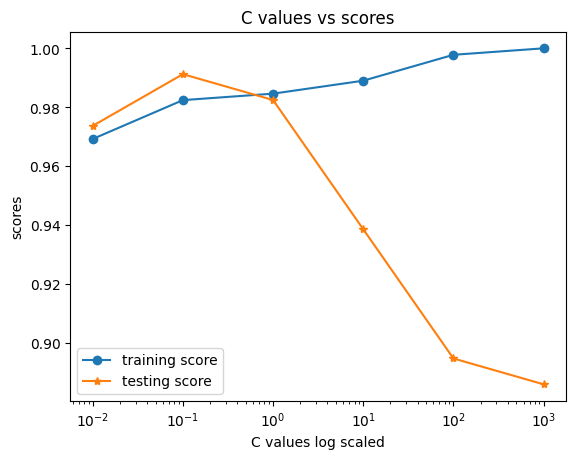

In [30]:
plt.semilogx(linear_df["C"],linear_df["training score"],marker = "o",label="training score")
plt.semilogx(linear_df["C"],linear_df["testing score"],marker = "*",label="testing score")
plt.legend()
plt.xlabel("C values log scaled")
plt.ylabel("scores")
plt.title("C values vs scores")
plt.show()

# support vector varies with C

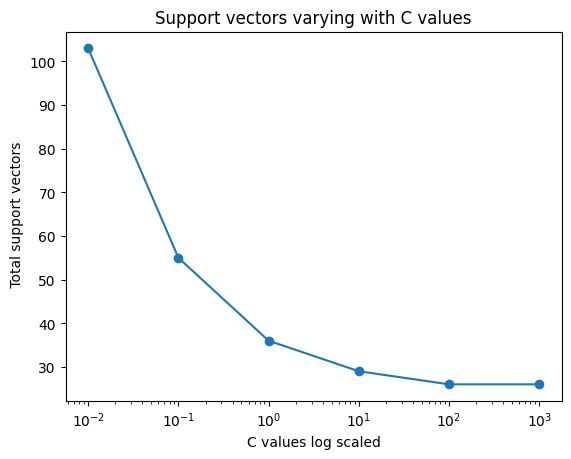

In [32]:
plt.semilogx(linear_df["C"],linear_df["total support vectors"],marker = "o")
plt.xlabel("C values log scaled")
plt.ylabel(" Total support vectors")
plt.title("Support vectors varying with C values")
plt.show()

# Decision boundary variations

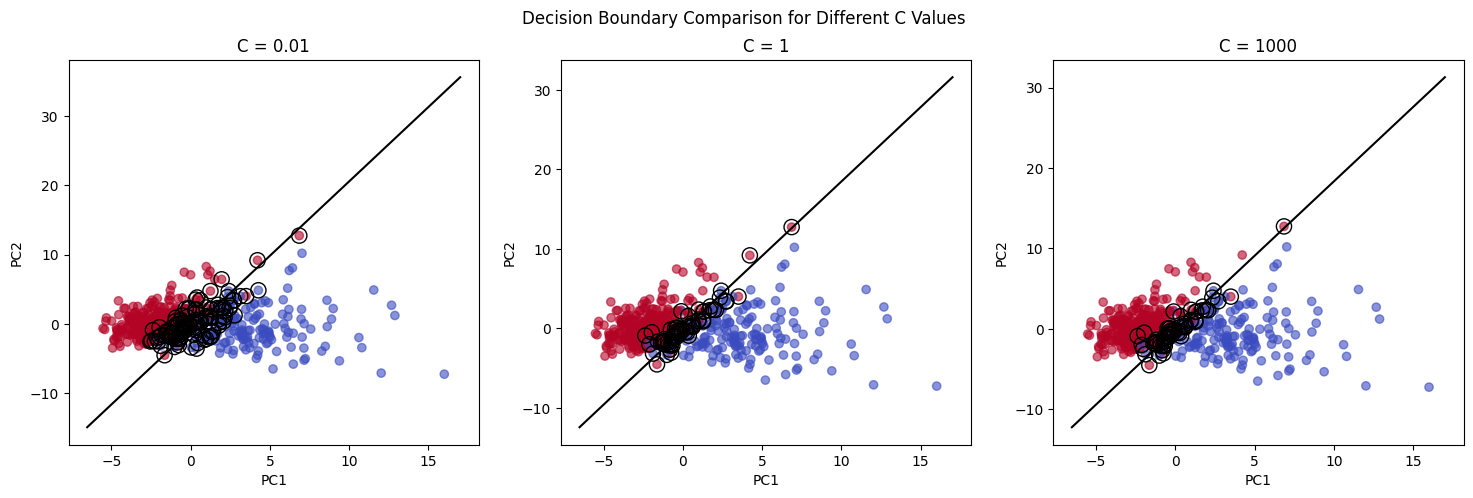

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)

C_values = [0.01, 1, 1000]

plt.figure(figsize=(18,5))

for i, c in enumerate(C_values):
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train_pca, y_train)

    w = svm.coef_[0]
    b = svm.intercept_[0]

    xx = np.linspace(X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1, 200)
    yy = -(w[0]*xx + b) / w[1]

    plt.subplot(1,3,i+1)
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.6)
    plt.plot(xx, yy, 'k-')
    plt.scatter(
        svm.support_vectors_[:,0],
        svm.support_vectors_[:,1],
        s=120, facecolors='none', edgecolors='black'
    )
    plt.title(f"C = {c}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.suptitle("Decision Boundary Comparison for Different C Values")
plt.show()


# final Observations

As the regularization parameter C increases, the SVM model shifts from a high-bias to a high-variance regime. Small C values produce wider margins with many support vectors, leading to underfitting, while large C values result in narrow margins with fewer support vectors, increasing the risk of overfitting. From the experimental results, C = 0.1 for the linear kernel provides the best generalization, achieving the highest test accuracy with a balanced margin width and support vector count. This demonstrates the critical tradeoff between margin maximization and classification accuracy controlled by C.